In [29]:
using QuantumOptics
using PyPlot

# Parameters
k = 30;
j = 30;
α = π/2;

In [30]:
# Basis
b = SpinBasis(j)

# Operator creation
Jx = 0.5*sigmax(b)
Jy = 0.5*sigmay(b)
Jz = 0.5*sigmaz(b)

# Floquet operator
FO = exp(dense(-1im*k*Jy*Jy/(2*(j+1/2))))*exp(dense(-1im*α*Jz));

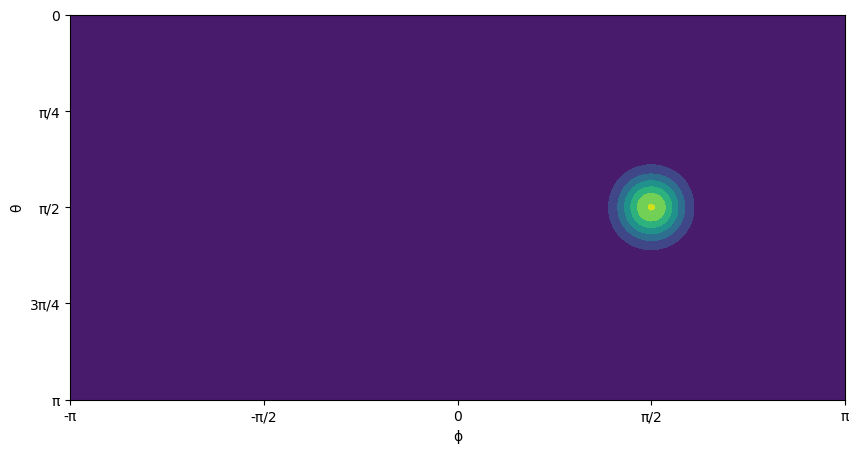

PyObject Text(0.5, 24.0, 'ϕ')

In [31]:
# Initial coherent spin state
θ = π/2
ϕ = π/2
ψ₀ = coherentspinstate(b,θ,ϕ)

# SU(2) Q function
res = 110 # resolution of the SU(2) Q function
figure(figsize=(10,5))
wx=collect(range(-π, stop=π, length=2res))#[-1pi:pi/(res):1pi;]
wy=collect(range(0, stop=π, length=res))#[0:1pi/(res):1pi;]
qsu2=qfuncsu2(ψ₀,res)
contourf(wx,wy,qsu2)
# appealing plot :-)
yticks([0.0, pi/4,pi/2,3pi/4,pi], ["π","3π/4","π/2","π/4",0] ) # North pole means θ = 0
xticks([-π,-π/2,0,π/2,π],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ")

In [32]:
# Stroboscopic Floquet dynamics
ψt = ψ₀;
for i=1:100000
    ψt.data .= normalize(FO*ψt).data
end

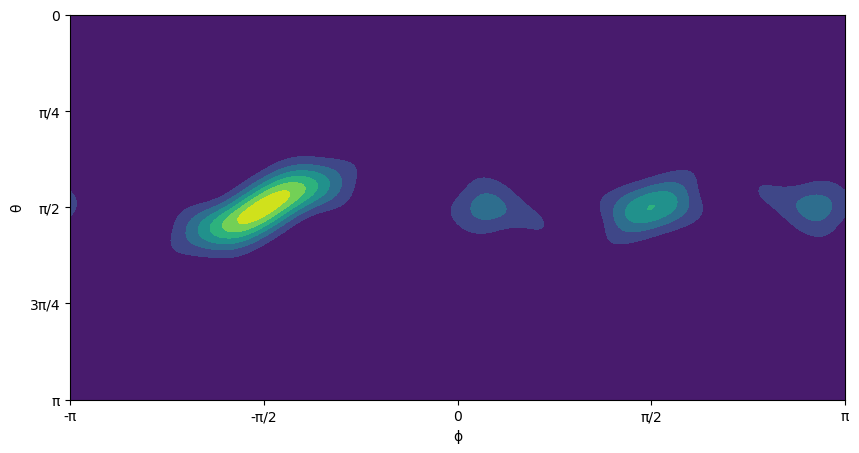

PyObject Text(0.5, 24.0, 'ϕ')

In [33]:
figure(figsize=(10,5))
qsu2final = qfuncsu2(ψt,res)
contourf(wx,wy,qsu2final)
yticks([0.0, pi/4,pi/2,3pi/4,pi], ["π","3π/4","π/2","π/4",0] ) 
xticks([-π,-π/2,0,π/2,π],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ")

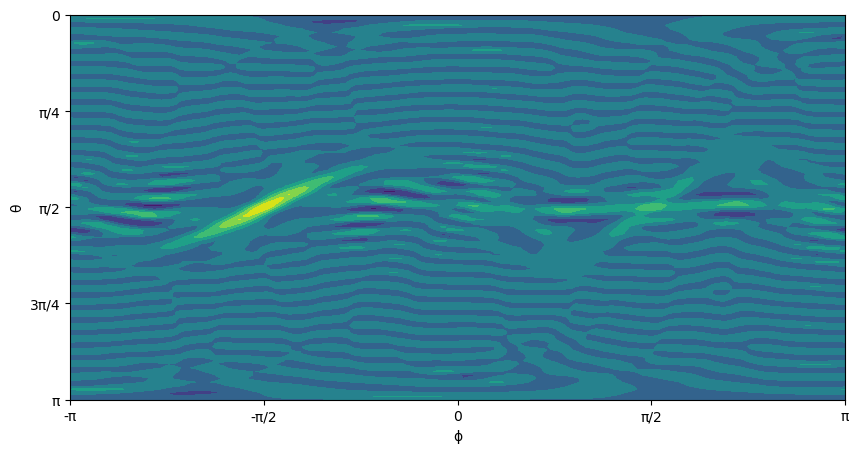

PyObject Text(0.5, 24.0, 'ϕ')

In [34]:
figure(figsize=(10,5))
wsu2 = wignersu2(ψt,res)
contourf(wx,wy,wsu2)
yticks([0.0, pi/4,pi/2,3pi/4,pi], ["π","3π/4","π/2","π/4",0] ) 
xticks([-π,-π/2,0,π/2,π],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ")